In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing the numpy library for numerical operations on arrays and matrices
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating static, animated, and interactive visualizations
from imblearn.over_sampling import RandomOverSampler  # Importing RandomOverSampler from imbalanced-learn to handle imbalanced datasets by oversampling
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling and normalization
import copy  # Importing the copy module for creating deep copies of objects
import seaborn as sns  # Importing seaborn for making statistical graphics
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn for performing linear regression

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repositor [https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demandl]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/ SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [3]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]  # List of column names used in the dataset

df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1').drop(["Date", "Holiday", "Seasons"], axis=1)  # Reads the dataset from a CSV file and removes unnecessary columns

In [5]:
df.columns = dataset_cols  # Renames the columns of the DataFrame to match the names specified in dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)  # Converts the "functional" column to binary: 1 if "Yes", 0 if not
df = df[df["hour"] == 12]  # Filters the DataFrame to keep only rows where the hour is 12
df = df.drop(["hour"], axis=1)  # Drops the "hour" column from the DataFrame

In [7]:
df.head() # Displays the first 5 rows of the DataFrame to provide a snapshot of the data after processing

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


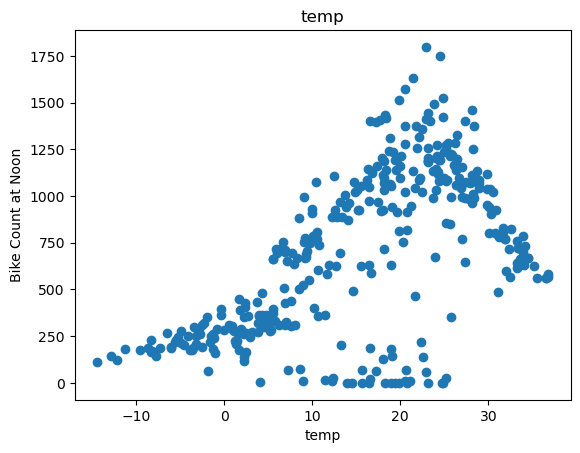

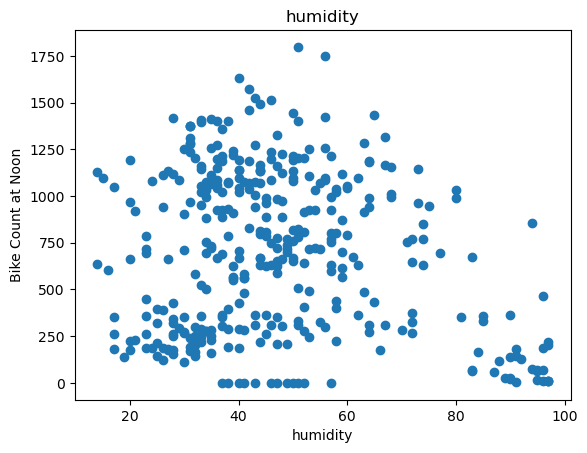

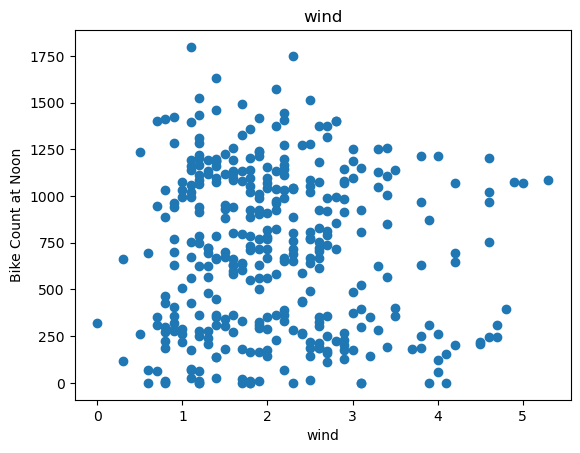

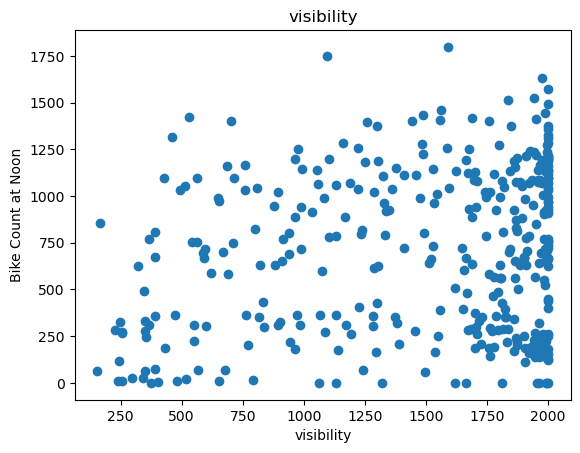

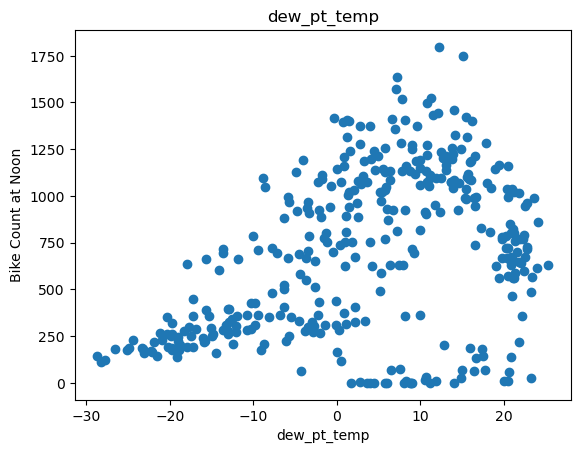

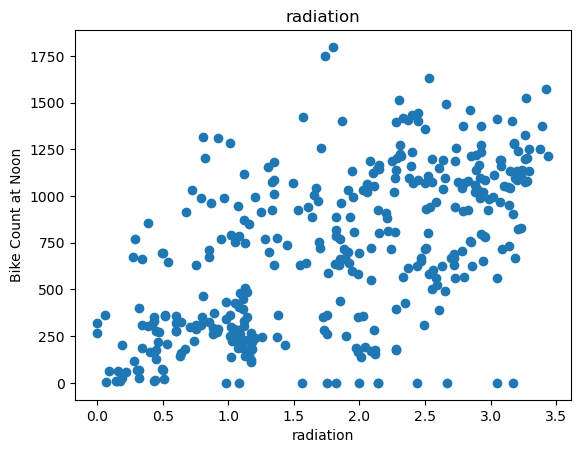

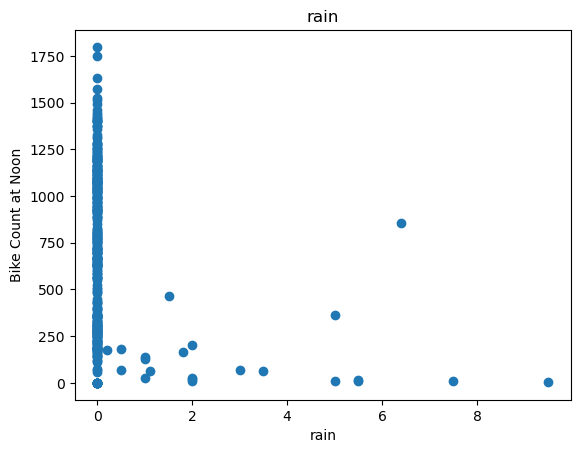

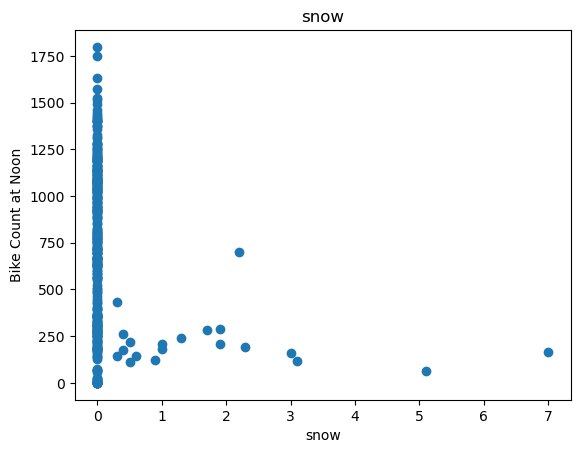

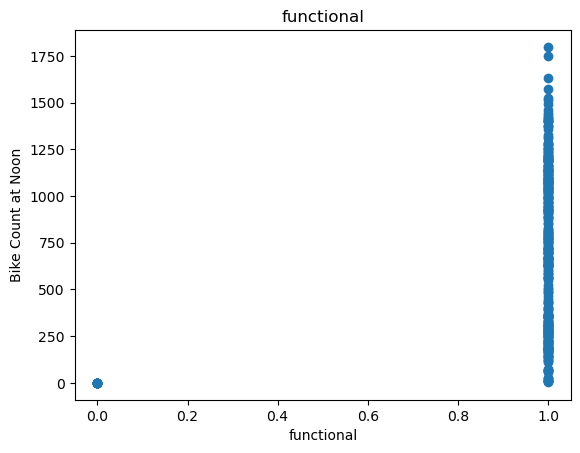

In [9]:
for label in df.columns[1:]:  # Iterates over all columns in the DataFrame except the first one
  plt.scatter(df[label], df["bike_count"])  # Creates a scatter plot of the current column against "bike_count"
  plt.title(label)  # Sets the title of the plot to the current column name
  plt.ylabel("Bike Count at Noon")  # Labels the y-axis as "Bike Count at Noon"
  plt.xlabel(label)  # Labels the x-axis with the current column name
  plt.show()  # Displays the scatter plot

In [11]:
df = df.drop(["wind", "visibility", "functional"], axis=1)  # Drops the columns "wind", "visibility", and "functional" from the DataFrame

In [13]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [15]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # Splits the DataFrame into training, validation, and test sets

D:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)  # Creates a deep copy of the DataFrame to avoid modifying the original DataFrame
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values  # Selects all columns except the target column y_label for features
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)  # If there's only one feature, reshape it to a 2D array with one column
    else:
      X = dataframe[x_labels].values  # Otherwise, select multiple columns as features

  y = dataframe[y_label].values.reshape(-1, 1)  # Extracts the target column y_label and reshapes it to a 2D array with one column
  data = np.hstack((X, y))  # Horizontally stacks features and target into a single array

  return data, X, y  # Returns the combined data array, features array, and target array

In [19]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])  # Extracts features and target for the training set using "temp" as the feature
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])  # Extracts features and target for the validation set using "temp" as the feature
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])  # Extracts features and target for the test set using "temp" as the feature

In [21]:
temp_reg = LinearRegression()  # Initializes a LinearRegression model
temp_reg.fit(X_train_temp, y_train_temp)  # Trains the model using the training data (features X_train_temp and target y_train_temp)

LinearRegression()

In [23]:
temp_reg.score(X_test_temp, y_test_temp)  # Evaluates the performance of the trained Linear Regression model on the test set

0.25541558488243765

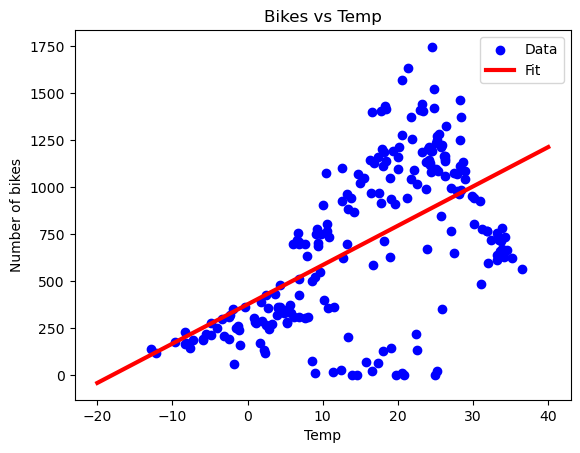

In [25]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")  # Creates a scatter plot of training data points with blue color
x = tf.linspace(-20, 40, 100)  # Generates 100 evenly spaced values between -20 and 40 using TensorFlow
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  # Plots the regression line using red color and a line width of 3
plt.legend()  # Adds a legend to the plot
plt.title("Bikes vs Temp")  # Sets the title of the plot
plt.ylabel("Number of bikes")  # Labels the y-axis
plt.xlabel("Temp")  # Labels the x-axis
plt.show()  # Displays the plot

# Multiple Linear Regression

In [27]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # Shuffles the DataFrame and splits it into training (60%), validation (20%), and test (20%) sets

_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])  # Extracts features and target for the training set using all columns except the target column "bike_count"
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])  # Extracts features and target for the validation set using all columns except the target column "bike_count"
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])  # Extracts features and target for the test set using all columns except the target column "bike_count"

D:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [29]:
all_reg = LinearRegression()  # Initializes a Linear Regression model
all_reg.fit(X_train_all, y_train_all)  # Trains the model using the training data (features X_train_all and target y_train_all)

LinearRegression()

In [31]:
all_reg.score(X_test_all, y_test_all)  # Evaluates the performance of the trained Linear Regression model on the test set

0.38839789812265635

In [33]:
y_pred_lr = all_reg.predict(X_test_all) # Uses the trained Linear Regression model to predict target values for the test set features

# Regression with Neural Net

In [35]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')  # Plots the training loss over epochs
  plt.plot(history.history['val_loss'], label='val_loss')  # Plots the validation loss over epochs
  plt.xlabel('Epoch')  # Labels the x-axis as 'Epoch'
  plt.ylabel('MSE')  # Labels the y-axis as 'MSE' (Mean Squared Error)
  plt.legend()  # Adds a legend to differentiate between training and validation loss
  plt.grid(True)  # Adds a grid to the plot for better readability
  plt.show()  # Displays the plot

In [37]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)  # Creates a normalization layer for a single feature
temp_normalizer.adapt(X_train_temp.reshape(-1))  # Fits the normalization layer to the training data, computing mean and variance for normalization

D:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,  # Adds the normalization layer to the model
    tf.keras.layers.Dense(1)  # Adds a dense layer with 1 unit as the output layer
])

In [41]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')  # Configures the model for training

In [43]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,  # Trains the model using the training data (features and target)
    verbose=0,  # Suppresses output messages during training
    epochs=1000,  # Number of epochs to train the model
    validation_data=(X_val_temp, y_val_temp)  # Provides validation data to evaluate the model's performance during training
)

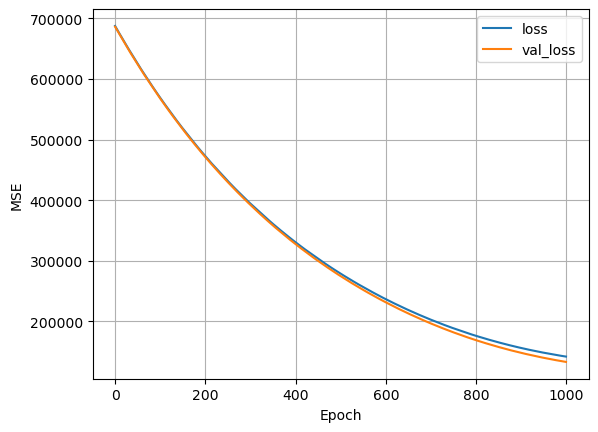

In [44]:
plot_loss(history) # Calls the plot_loss function to visualize the training and validation loss over epochs

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


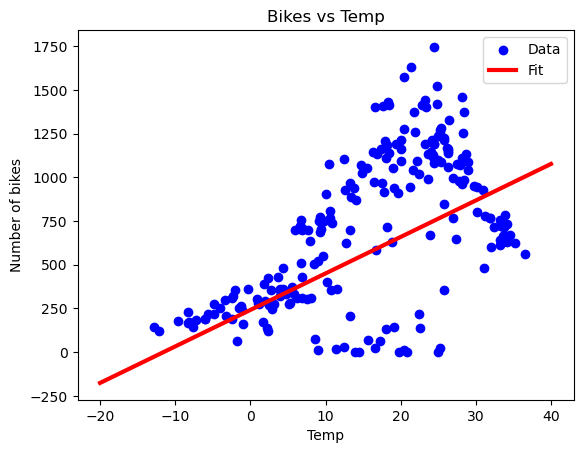

In [47]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")  # Creates a scatter plot of the training data with blue color
x = tf.linspace(-20, 40, 100)  # Generates 100 evenly spaced values between -20 and 40 using TensorFlow
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  # Plots the predictions from the neural network model as a red line
plt.legend()  # Adds a legend to distinguish between the data points and the fitted line
plt.title("Bikes vs Temp")  # Sets the title of the plot
plt.ylabel("Number of bikes")  # Labels the y-axis
plt.xlabel("Temp")  # Labels the x-axis
plt.show()  # Displays the plot

# Neural Net

In [49]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)  # Creates a normalization layer for a single feature
temp_normalizer.adapt(X_train_temp.reshape(-1))  # Fits the normalization layer to the training data to compute mean and variance

nn_model = tf.keras.Sequential([
    temp_normalizer,  # Applies normalization to input data
    tf.keras.layers.Dense(32, activation='relu'),  # Adds a dense layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(32, activation='relu'),  # Adds another dense layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(32, activation='relu'),  # Adds a third dense layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(1)  # Adds an output dense layer with 1 unit for regression output
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')  # Compiles the model with Adam optimizer and mean squared error loss

D:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
history = nn_model.fit(
    X_train_temp, y_train_temp,  # Trains the neural network model using the training data (features and target)
    validation_data=(X_val_temp, y_val_temp),  # Provides validation data to monitor performance during training
    verbose=0,  # Suppresses output messages during training
    epochs=100  # Specifies the number of epochs for training
)

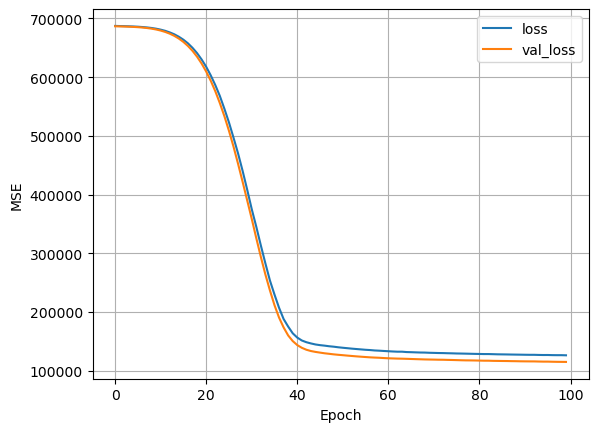

In [52]:
plot_loss(history) # Calls the plot_loss function to visualize the training and validation loss over epochs

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


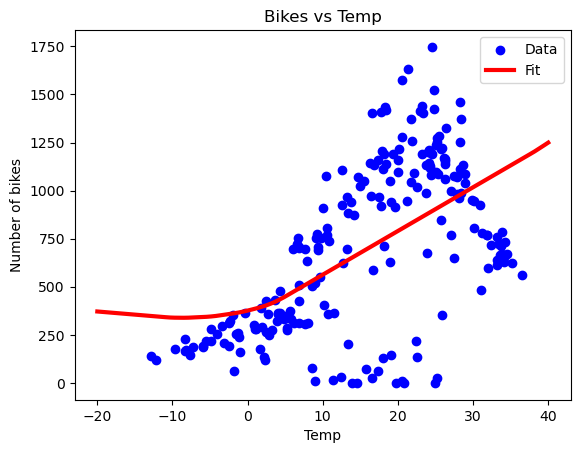

In [55]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")  # Creates a scatter plot of the training data with blue color
x = tf.linspace(-20, 40, 100)  # Generates 100 evenly spaced values between -20 and 40 using TensorFlow
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  # Plots the predictions from the neural network model as a red line
plt.legend()  # Adds a legend to differentiate between the data points and the fitted line
plt.title("Bikes vs Temp")  # Sets the title of the plot
plt.ylabel("Number of bikes")  # Labels the y-axis as "Number of bikes"
plt.xlabel("Temp")  # Labels the x-axis as "Temp"
plt.show()  # Displays the final plot

In [57]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)  # Creates a normalization layer for features with 6 dimensions
all_normalizer.adapt(X_train_all)  # Fits the normalization layer to the training data, computing mean and variance for each feature

D:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
nn_model = tf.keras.Sequential([
    all_normalizer,  # Applies normalization to input data with 6 features
    tf.keras.layers.Dense(32, activation='relu'),  # Adds a dense layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(32, activation='relu'),  # Adds another dense layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(1)  # Adds an output dense layer with 1 unit for regression output
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')  # Compiles the model with Adam optimizer and mean squared error loss

In [61]:
history = nn_model.fit(
    X_train_all, y_train_all,  # Trains the neural network model using the entire feature set and target values
    validation_data=(X_val_all, y_val_all),  # Provides validation data to monitor the model's performance on unseen data during training
    verbose=0,  # Suppresses output messages during training for a cleaner console output
    epochs=100  # Specifies the number of epochs (iterations over the training data) to train the model
)

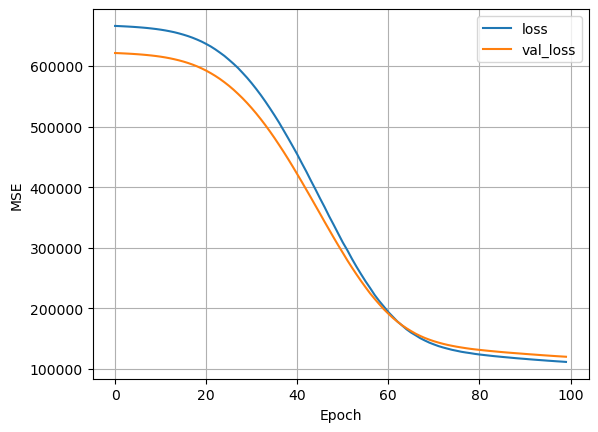

In [62]:
plot_loss(history)  # Calls the plot_loss function to visualize the training and validation loss over epochs for the neural network model

In [65]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)  # Predicts target values using the linear regression model
y_pred_nn = nn_model.predict(X_test_all)  # Predicts target values using the neural network model

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B14FE83CE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [67]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()  # Computes the Mean Squared Error (MSE) between predicted values and real target values

In [69]:
MSE(y_pred_lr, y_test_all)  # Calculates the Mean Squared Error (MSE) between the predictions made by the linear regression model and the actual test target values

126352.34864270253

In [71]:
MSE(y_pred_nn, y_test_all)  # Calculates the Mean Squared Error (MSE) between the predictions made by the neural network model and the actual test target values

140652.05294582967

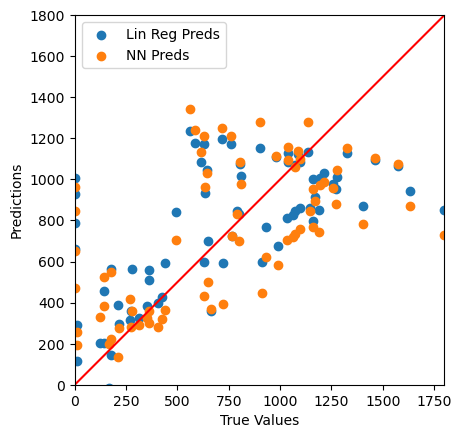

In [73]:
ax = plt.axes(aspect="equal")  # Creates an axis with equal scaling for both x and y axes
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")  # Plots true values vs. predicted values from the linear regression model
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")  # Plots true values vs. predicted values from the neural network model
plt.xlabel("True Values")  # Labels the x-axis as "True Values"
plt.ylabel("Predictions")  # Labels the y-axis as "Predictions"
lims = [0, 1800]  # Defines limits for the x and y axes
plt.xlim(lims)  # Sets the x-axis limits
plt.ylim(lims)  # Sets the y-axis limits
plt.legend()  # Adds a legend to the plot to differentiate between the linear regression and neural network predictions
_ = plt.plot(lims, lims, c="red")  # Plots a red diagonal line representing perfect predictions (where true values equal predictions)